<a href="https://colab.research.google.com/github/Alfaalputra/machine-learning/blob/main/BISINDO_Sign_Detection_Faster-RCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
print(torch.cuda.is_available())

True


In [ ]:
!pip install detecto

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!curl -L "https://app.roboflow.com/ds/t5Mqb3nJWg?key=fYjV5crDoK" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   891  100   891    0     0   2062      0 --:--:-- --:--:-- --:--:--  2062
100 22.3M  100 22.3M    0     0  25.3M      0 --:--:-- --:--:-- --:--:--  250M
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
   creating: test/
 extracting: test/IMG_0003_JPG.rf.9ca6d0bdbd36c02b175b9fe7a39702fb.jpg  
 extracting: test/IMG_0003_JPG.rf.9ca6d0bdbd36c02b175b9fe7a39702fb.xml  
 extracting: test/IMG_0008_JPG.rf.98e38200057ce6d39123644beb789055.jpg  
 extracting: test/IMG_0008_JPG.rf.98e38200057ce6d39123644beb789055.xml  
 extracting: test/IMG_0012_JPG.rf.8e151f4b54f2675fe2c2ced66a13520e.jpg  
 extracting: test/IMG_0012_JPG.rf.8e151f4b54f2675fe2c2ced66a13520e.xml  
 extracting: test/IMG_0015_JPG.rf.df62ba0240b3eca15d1504662921fda8.jpg  
 extracting: test/IMG_0015_JPG.rf.df62ba0240b3eca15d150

In [ ]:
from detecto import core, utils, visualize
from detecto.visualize import show_labeled_image, plot_prediction_grid
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
custom_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ToTensor(),
    utils.normalize_transform(),
])

In [ ]:
Train_dataset=core.Dataset('/content/train', transform=custom_transforms)
Test_dataset = core.Dataset('/content/test')

In [ ]:
len(Train_dataset)

1663

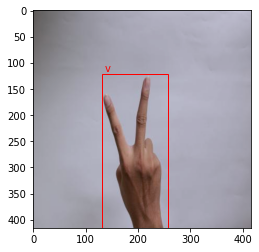

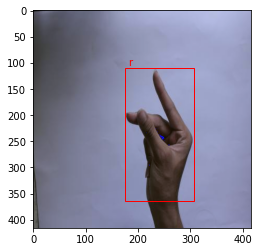

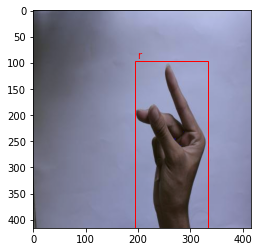

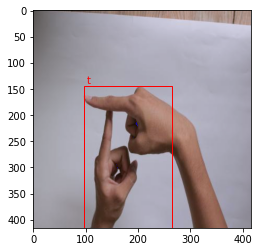

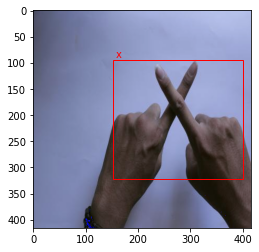

In [ ]:
from random import randint
for i in range(5):
    image, targets = Train_dataset[randint(0, 1662)]
    show_labeled_image(image, targets['boxes'], targets['labels'])

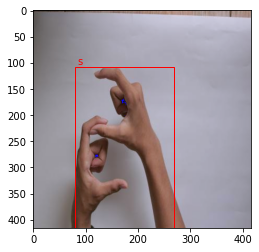

In [ ]:
image, targets = Train_dataset[0]
show_labeled_image(image, targets['boxes'], targets['labels'])

In [ ]:
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p',
          'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'] 

In [ ]:
loader=core.DataLoader(Train_dataset, batch_size=8, shuffle=True)
model = core.Model(labels)

In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
losses = model.fit(loader, Test_dataset, epochs=20, lr_step_size=50, learning_rate=0.0001, verbose=True)

Epoch 1 of 20
Begin iterating over training dataset


100%|██████████| 208/208 [05:32<00:00,  1.60s/it]


Begin iterating over validation dataset


100%|██████████| 416/416 [00:41<00:00, 10.07it/s]


Loss: 0.29745230157501423
Epoch 2 of 20
Begin iterating over training dataset


100%|██████████| 208/208 [05:31<00:00,  1.59s/it]


Begin iterating over validation dataset


100%|██████████| 416/416 [00:42<00:00,  9.82it/s]


Loss: 0.30588906378341985
Epoch 3 of 20
Begin iterating over training dataset


100%|██████████| 208/208 [05:30<00:00,  1.59s/it]


Begin iterating over validation dataset


100%|██████████| 416/416 [00:41<00:00, 10.01it/s]


Loss: 0.30911822262435007
Epoch 4 of 20
Begin iterating over training dataset


100%|██████████| 208/208 [05:31<00:00,  1.60s/it]


Begin iterating over validation dataset


100%|██████████| 416/416 [00:41<00:00,  9.98it/s]


Loss: 0.3108136907685548
Epoch 5 of 20
Begin iterating over training dataset


100%|██████████| 208/208 [05:31<00:00,  1.59s/it]


Begin iterating over validation dataset


100%|██████████| 416/416 [00:41<00:00, 10.02it/s]


Loss: 0.312045908998698
Epoch 6 of 20
Begin iterating over training dataset


100%|██████████| 208/208 [05:30<00:00,  1.59s/it]


Begin iterating over validation dataset


100%|██████████| 416/416 [00:41<00:00,  9.94it/s]


Loss: 0.30382141094798076
Epoch 7 of 20
Begin iterating over training dataset


100%|██████████| 208/208 [05:29<00:00,  1.59s/it]


Begin iterating over validation dataset


100%|██████████| 416/416 [00:41<00:00, 10.06it/s]


Loss: 0.28270696827138847
Epoch 8 of 20
Begin iterating over training dataset


100%|██████████| 208/208 [05:29<00:00,  1.59s/it]


Begin iterating over validation dataset


100%|██████████| 416/416 [00:41<00:00, 10.05it/s]


Loss: 0.2616743925743951
Epoch 9 of 20
Begin iterating over training dataset


100%|██████████| 208/208 [05:29<00:00,  1.59s/it]


Begin iterating over validation dataset


100%|██████████| 416/416 [00:41<00:00, 10.08it/s]


Loss: 0.22991187039476174
Epoch 10 of 20
Begin iterating over training dataset


100%|██████████| 208/208 [05:29<00:00,  1.58s/it]


Begin iterating over validation dataset


100%|██████████| 416/416 [00:41<00:00, 10.13it/s]


Loss: 0.2091091128710944
Epoch 11 of 20
Begin iterating over training dataset


 38%|███▊      | 80/208 [02:05<03:22,  1.59s/it]

In [ ]:
plt.plot(losses)
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/model_weights_bisindo5.pth')

In [ ]:
model = core.Model.load('/content/drive/MyDrive/model_weights_bisindo5.pth',
                        labels)

In [ ]:
test = '/content/drive/MyDrive/test1/'

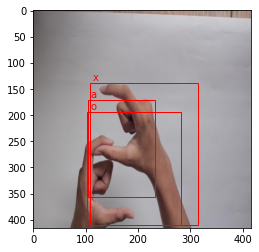

In [ ]:
# for i in test:
image = utils.read_image('/content/test/IMG_0386_JPG.rf.96306139d370f7ca053e77c8e5070c52.jpg') 
predictions = model.predict(image)
labels, boxes, scores = predictions
show_labeled_image(image, boxes, labels)

In [ ]:
labels

['o', 'x', 'a']

In [ ]:
scores

tensor([0.0525, 0.0523, 0.0516])

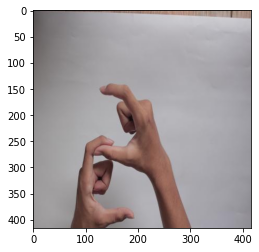

[] tensor([])


In [ ]:
thresh=0.6
filtered_indices=np.where(scores>thresh)
filtered_scores=scores[filtered_indices]
filtered_boxes=boxes[filtered_indices]
num_list = filtered_indices[0].tolist()
filtered_labels = [labels[i] for i in num_list]
show_labeled_image(image, filtered_boxes, filtered_labels)
print(filtered_labels, filtered_scores)

In [ ]:
import cv2, time
from google.colab.patches import cv2_imshow
from threading import Thread

class ThreadedCamera(object):
    def __init__(self, source = 0):

        self.capture = cv2.VideoCapture(source)

        self.thread = Thread(target = self.update, args = ())
        self.thread.daemon = True
        self.thread.start()

        self.status = False
        self.frame  = None

    def update(self):
        while True:
            if self.capture.isOpened():
                (self.status, self.frame) = self.capture.read()

    def grab_frame(self):
        if self.status:
            return self.frame
        return None
if __name__ == '__main__':
    stream_link = 'tcp://193.168.0.1:6200/'
    vid_link = '/content/drive/MyDrive/uji/40km.mp4'
    vid_gopro = 'D:/gopro/GH030054_Trim.MP4'
    webcam = 0
    streamer = ThreadedCamera(webcam)

    prev_frame_time = 0
    new_frame_time = 0


    while True:
        frame = streamer.grab_frame()
        # frame = cv2.rotate(frame, cv2.ROTATE_180)
        if frame is not None:
            labels, boxes, scores = model.predict(frame)

            # time when we finish processing for this frame
            new_frame_time = time.time()
            fps = 1/(new_frame_time-prev_frame_time)
            prev_frame_time = new_frame_time
            fps = str(fps)
            # print('FPS:',fps)

            score_filter=0.2
            # Plot each box with its label and score
            for i in range(boxes.shape[0]):
                if scores[i] < score_filter:
                    continue

                box = boxes[i]
                cv2.rectangle(frame, (int(box[0]), int(box[1])), (int(box[2]), int(box[3])), (255, 0, 0), 3)
                if labels:
                    cv2.putText(frame, '{}: {}'.format(labels[i], round(scores[i].item(), 2)), (int(box[0]), int(box[1] - 10)),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 3)
                    print(labels[i],':', scores[i],', FPS:',fps)
            frame = cv2.resize(frame, (1080,720))
            cv2_imshow(frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    streamer.release()
    cv2.destroyAllWindows()

KeyboardInterrupt: ignored

In [ ]:
from sklearn.metrics import confusion_matrix
import os

In [ ]:
predicted = []

for img in os.listdir(test):
    image = utils.read_image(test + img)
    predictions = model.predict(image)
    labels, boxes, scores = predictions
    biggest_score = max(scores, default=0)
    # show_labeled_image(image, boxes, labels)
    # thresh=0.6
    filtered_indices=np.where(biggest_score)
    filtered_scores=scores[filtered_indices]
    # filtered_boxes=boxes[filtered_indices]
    num_list = filtered_indices[0].tolist()
    filtered_labels = [labels[i] for i in num_list]
    predicted.extend(filtered_labels)
    # show_labeled_image(image, filtered_boxes, filtered_labels)

In [ ]:
print(predicted)

['n', 'x', 'b', 'e', 'b', 'b', 'd', 'f', 'r', 'n', 'm', 'r', 'c', 'v', 'w', 'f', 'u', 'u', 't', 'r', 'q', 'p', 'x', 't', 'k', 'a', 'u', 't', 'z', 'd', 'w', 'i', 'b', 'n', 'l', 'f', 'm', 'y', 'x', 'o', 'y', 'e', 'f', 'b', 'f', 'y', 'p', 'r', 'g', 's', 'b', 'w', 'k', 'x', 'k', 'e', 'k', 't', 'b', 'p', 'w', 'y', 'q', 's', 'n', 'i', 'p', 't', 'f', 'g', 'x', 'h', 'z', 'm', 'e', 'z', 'q', 'a', 'l', 'q', 'y', 'n', 'b', 'l', 'l', 't', 'r', 'd', 'z', 'e', 'r', 'b', 'e', 'q', 'z', 'd', 'c', 'p', 'z', 'r', 't', 'u', 'x', 'k', 'e', 'g', 'g', 'u', 'f', 'w', 'z', 'c', 'j', 'z', 'u', 'b', 'o', 'o', 'u', 't', 'q', 'i', 't', 'x', 'x', 'g', 'k', 'x', 'z', 'p', 'c', 's', 'm', 'j', 'a', 'l', 'p', 'q', 'h', 'c', 'v', 'p', 'q', 'f', 'c', 'n', 'p', 'i', 'c', 'x', 'z', 'e', 'g', 'a', 'v', 'r', 'k', 'w', 's', 's', 'u', 'y', 'u', 'g', 'j', 'q', 'h', 'r', 'a', 'm', 'b', 'a', 'j', 'x', 'l', 'p', 'y', 'j', 'b', 'y', 'y', 'p', 'u', 'z', 't', 'l', 'h', 'd', 't', 't', 'p', 'j', 'w', 'b', 'v', 'z', 'q', 'b', 'h', 'n',

In [ ]:
import cv2
import glob
import pandas as pd
import xml.etree.ElementTree as ET
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
test_anot = '/content/test/'

In [ ]:
xml_list = []

for xml_file in glob.glob(test_anot + '/*.xml'):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    for member in root.findall('object'):
        bbx = member.find('bndbox')
        xmin = int(bbx.find('xmin').text)
        ymin = int(bbx.find('ymin').text)
        xmax = int(bbx.find('xmax').text)
        ymax = int(bbx.find('ymax').text)
        label = member.find('name').text

        value = (root.find('filename').text,
                  int(root.find('size')[0].text),
                  int(root.find('size')[1].text),
                  label,
                  xmin,
                  ymin,
                  xmax,
                  ymax
                  )
        xml_list.append(value)
column_name = ['filename', 'width', 'height',
                'class', 'xmin', 'ymin', 'xmax', 'ymax']
xml_df_test = pd.DataFrame(xml_list, columns=column_name)
xml_df_test = xml_df_test.drop(['width', 'height', 'xmin', 'ymin', 'xmax', 'ymax'], axis=1)
xml_df_test

,filename,class
0,IMG_9846_JPG.rf.62f89bb9549bacecd647e022bd67be...,k
1,IMG_0458_JPG.rf.2f2ffb4741bdf1dad9350c754c8f73...,t
2,IMG_1820_JPG.rf.6bece44723071d120a3631825603cb...,r
3,IMG_0679_JPG.rf.7da0a8c60275cf9e5242eb69611ef3...,v
4,IMG_2033_JPG.rf.53e52d171803f0605f6f3b22bdb456...,i
...,...,...
411,IMG_0576_JPG.rf.884c0ba1a47eac2f922c6254e3a409...,u
412,IMG_9561_JPG.rf.062004b1b4d6c98f4762a2ea2a8310...,g
413,IMG_9603_JPG.rf.7143dbe36c634dbfc3db8f44fbfdcf...,g
414,IMG_0037_JPG.rf.41d62050222bea7cc511096e2c0fd8...,n


In [ ]:
y_actual = xml_df_test["class"].to_numpy()

In [ ]:
y_actual

array(['k', 't', 'r', 'v', 'i', 'c', 'n', 'l', 'x', 'w', 'j', 'b', 's',
       'o', 'r', 'n', 'v', 't', 'u', 'r', 'l', 's', 'z', 'a', 'z', 'n',
       'i', 'g', 'y', 'h', 'a', 'd', 'b', 'f', 't', 'n', 'r', 'e', 'j',
       'i', 'j', 'z', 'p', 'e', 'r', 'a', 'p', 'e', 'k', 'm', 'v', 'u',
       't', 'x', 't', 'k', 'p', 'r', 'b', 'q', 'q', 'r', 'e', 'e', 'o',
       'y', 'z', 'u', 'l', 'u', 'f', 'h', 's', 'l', 'd', 'x', 'z', 'p',
       'g', 's', 'm', 'p', 'r', 'a', 'i', 'h', 'g', 'i', 'o', 'b', 's',
       'f', 'y', 'c', 'e', 'c', 'k', 'p', 'z', 'o', 'v', 'f', 'f', 'm',
       'b', 'b', 's', 'l', 'v', 'w', 'u', 'd', 'o', 'c', 'b', 'k', 'y',
       'p', 'y', 'd', 'j', 'g', 'f', 'c', 'c', 'z', 'q', 'd', 'p', 'e',
       'p', 'p', 'd', 'm', 't', 'i', 's', 'z', 'i', 'o', 'r', 't', 'p',
       'j', 'x', 'g', 't', 'k', 'e', 'o', 'q', 'y', 'z', 'i', 'r', 'w',
       'h', 'm', 'n', 'd', 'l', 'b', 'e', 'n', 'n', 'b', 'b', 'a', 'z',
       'b', 'x', 'j', 'y', 'g', 'd', 'd', 't', 'n', 'f', 't', 'k

In [ ]:
print(len(predicted), len(y_actual))

416 416


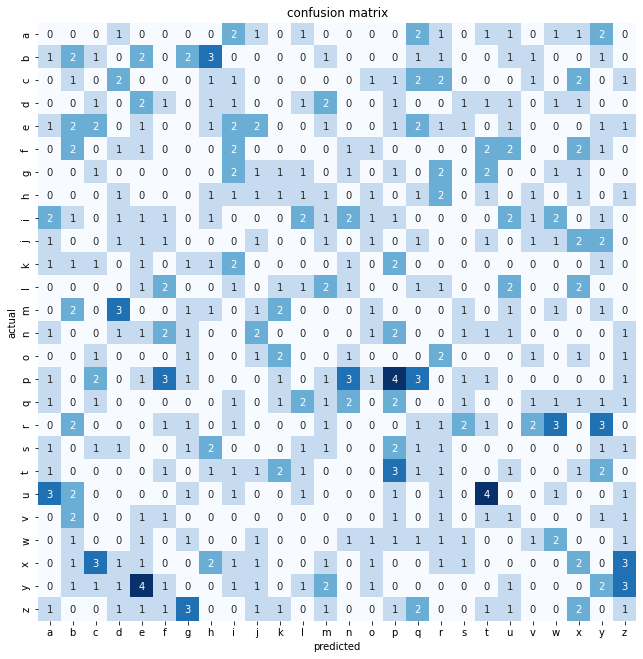

In [ ]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

cm = confusion_matrix(y_actual, predicted)
df_cm = pd.DataFrame(cm, columns=np.unique(y_actual), index=np.unique(y_actual))
df_cm.index.name = 'actual'
df_cm.columns.name = 'predicted'
f,ax = plt.subplots(figsize = (11,11))
cmap = sns.color_palette('Blues', as_cmap=True)
sns.heatmap(df_cm, cbar =False, annot=True, cmap=cmap, square=True, fmt='.0f', annot_kws={'size':10})

plt.title("confusion matrix")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
 print(classification_report(y_actual, predicted))

              precision    recall  f1-score   support

           a       0.00      0.00      0.00        14
           b       0.10      0.12      0.11        17
           c       0.00      0.00      0.00        15
           d       0.00      0.00      0.00        15
           e       0.05      0.05      0.05        20
           f       0.00      0.00      0.00        15
           g       0.00      0.00      0.00        14
           h       0.07      0.07      0.07        15
           i       0.00      0.00      0.00        20
           j       0.07      0.07      0.07        15
           k       0.00      0.00      0.00        12
           l       0.08      0.07      0.07        15
           m       0.00      0.00      0.00        15
           n       0.00      0.00      0.00        15
           o       0.00      0.00      0.00        11
           p       0.17      0.17      0.17        24
           q       0.00      0.00      0.00        17
           r       0.05    